In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

sys.path.append(os.path.expandvars('$SCRATCH/code/plots'))
from plots import galcencyl_to_lbdxy, plot_vRvT, plot_RvT, plot_vlvb, plot_Rvl, plot_los, plot_los_cones

# Integrated with Short, Fast Dehnen Bar
Bar parameters (mostly the same as Dehnen 2000):
- Pattern speed $\omega = 1.85$ times the local circular frequency
- Initial bar angle $\phi = 25^\circ$
- Growth time $t = 5$ bar periods
- Bar radius: $R_b = 3.5$ kpc
- Bar strength: $\alpha = 1/75$

Total integration time: 10 bar periods (~1 Gyr), beginning at the initial formation of the bar

In [2]:
filename = os.path.expandvars('$SCRATCH/data/short_fast_bar/100000000_samples_0.fits')
data = Table.read(filename, format='fits')
R, vR, vT, z, vz, phi = data['R', 'vR', 'vT', 'z', 'vz', 'phi'].as_array().view((np.float64, 6)).T
phi[phi > np.pi] -= 2*np.pi
del data

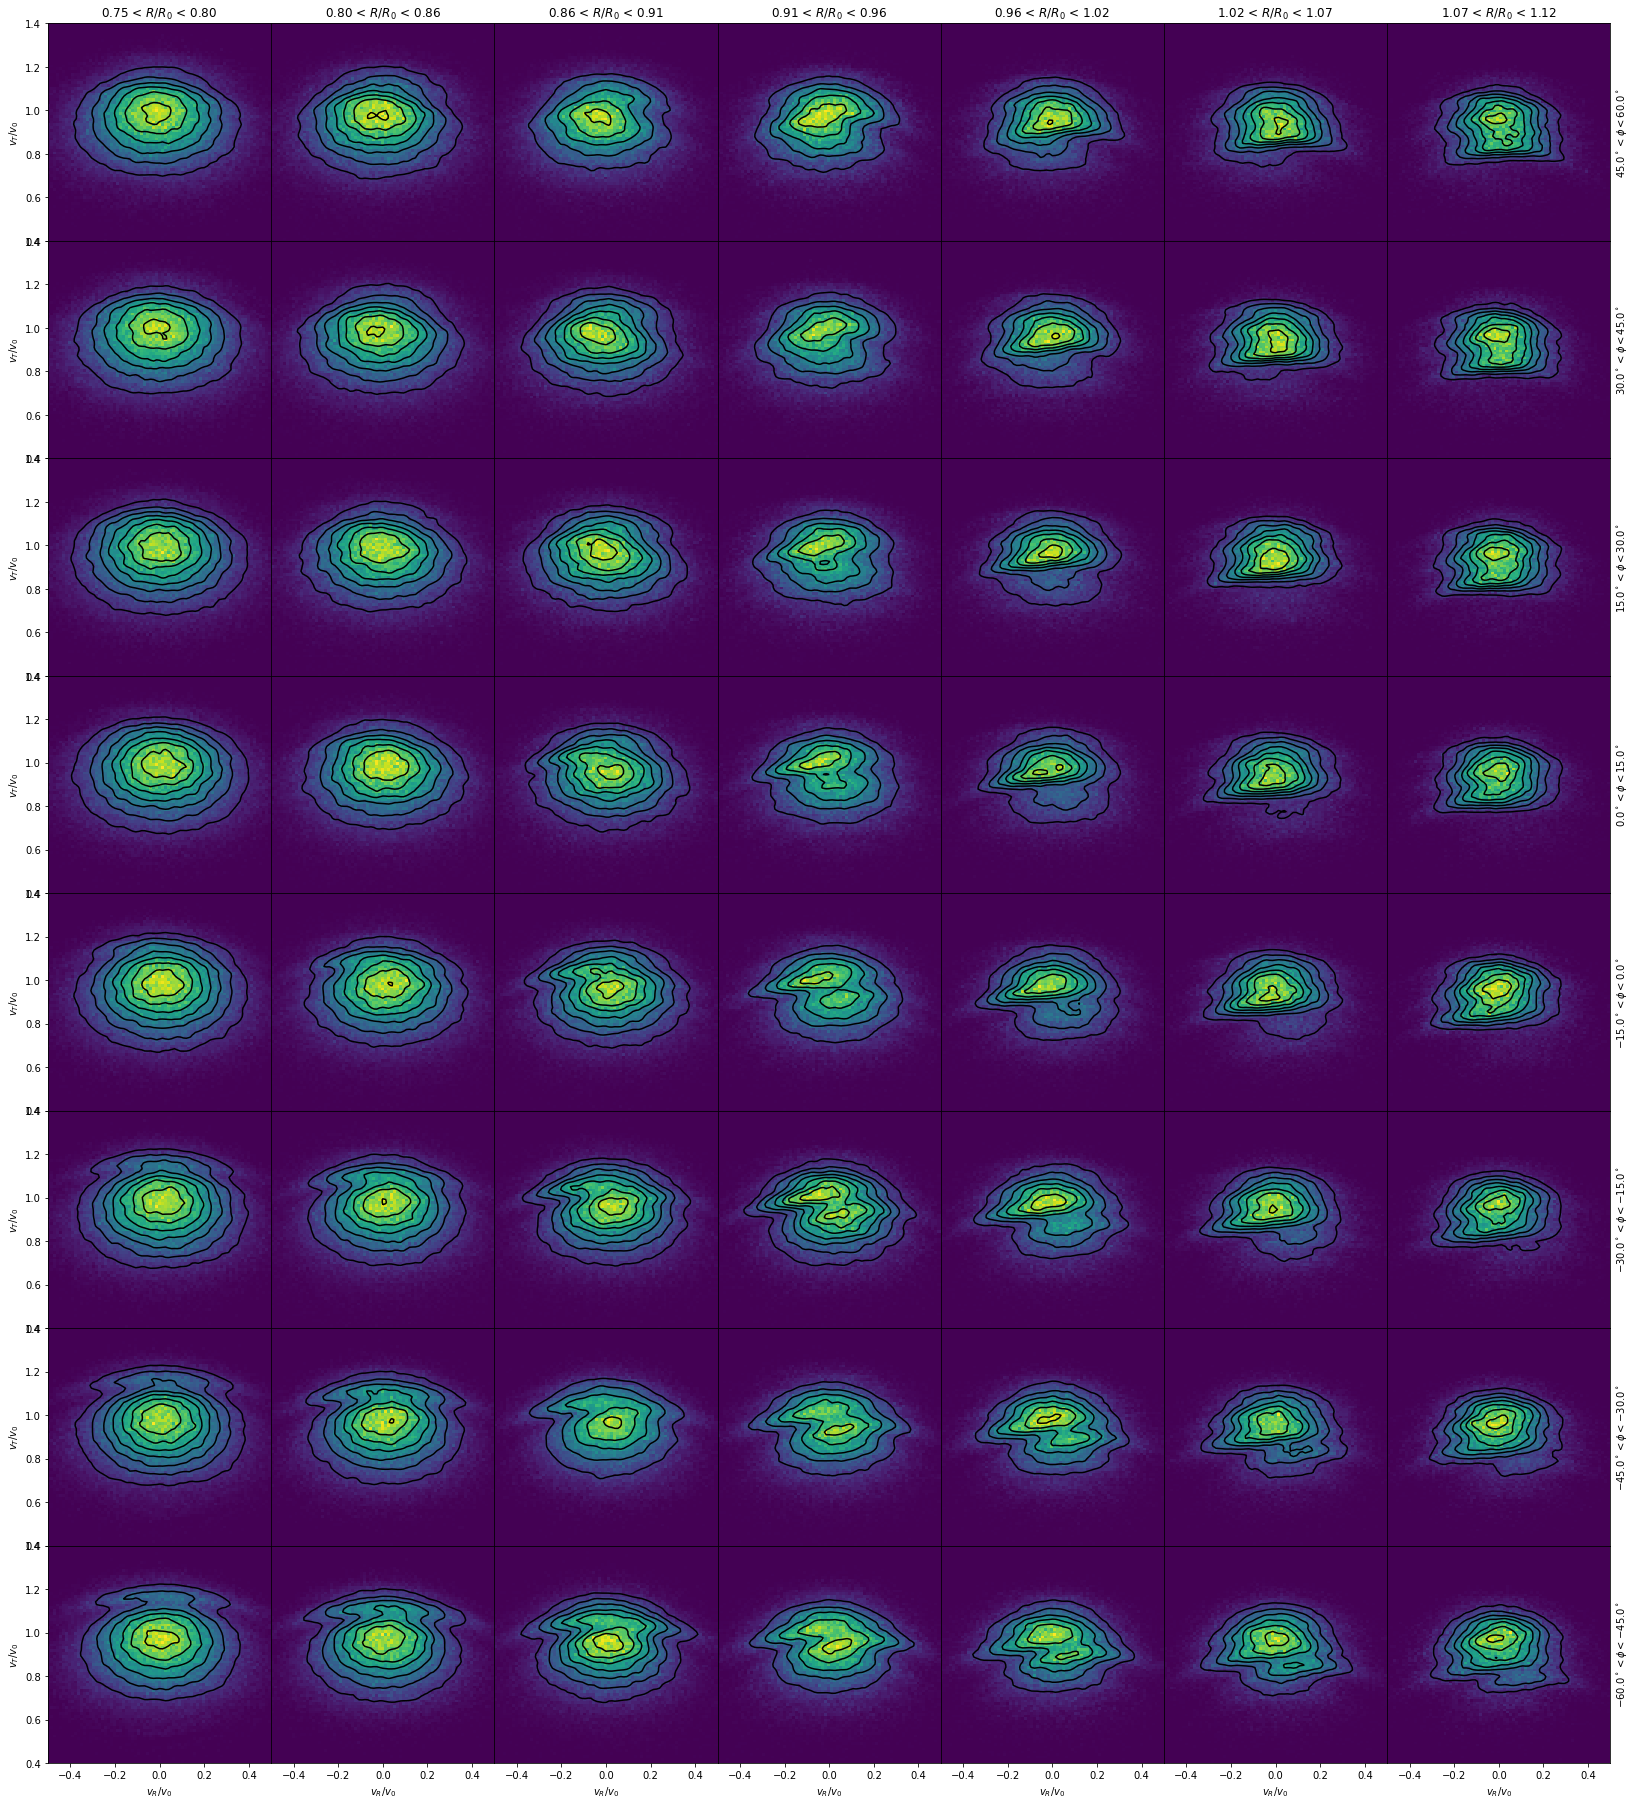

In [3]:
rows = 8
cols = 7
minR = 6
maxR = 9
minphi = -np.pi/3
maxphi = np.pi/3
plot_vRvT(rows, cols, minR, maxR, minphi, maxphi, R, phi, vR, vT)

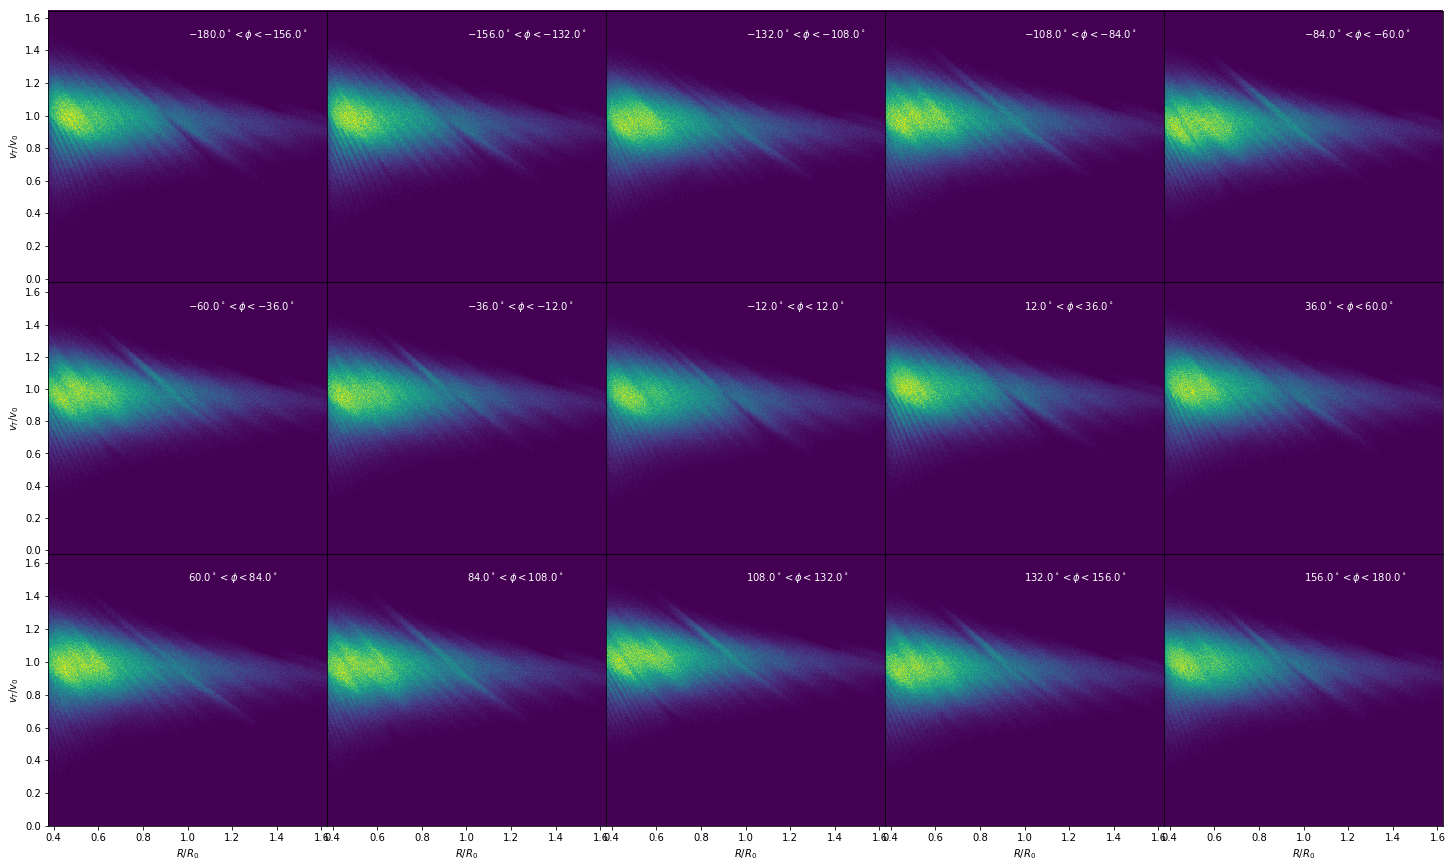

In [4]:
rows = 3
cols = 5
minphi = -np.pi
maxphi = np.pi
plot_RvT(rows, cols, minphi, maxphi, R, phi, vT)

In [5]:
l, b, d, vr, pmll, pmbb, X, Y = galcencyl_to_lbdxy(R, phi, z, vR, vT, vz)
vl = pmll * d
vb = pmbb * d

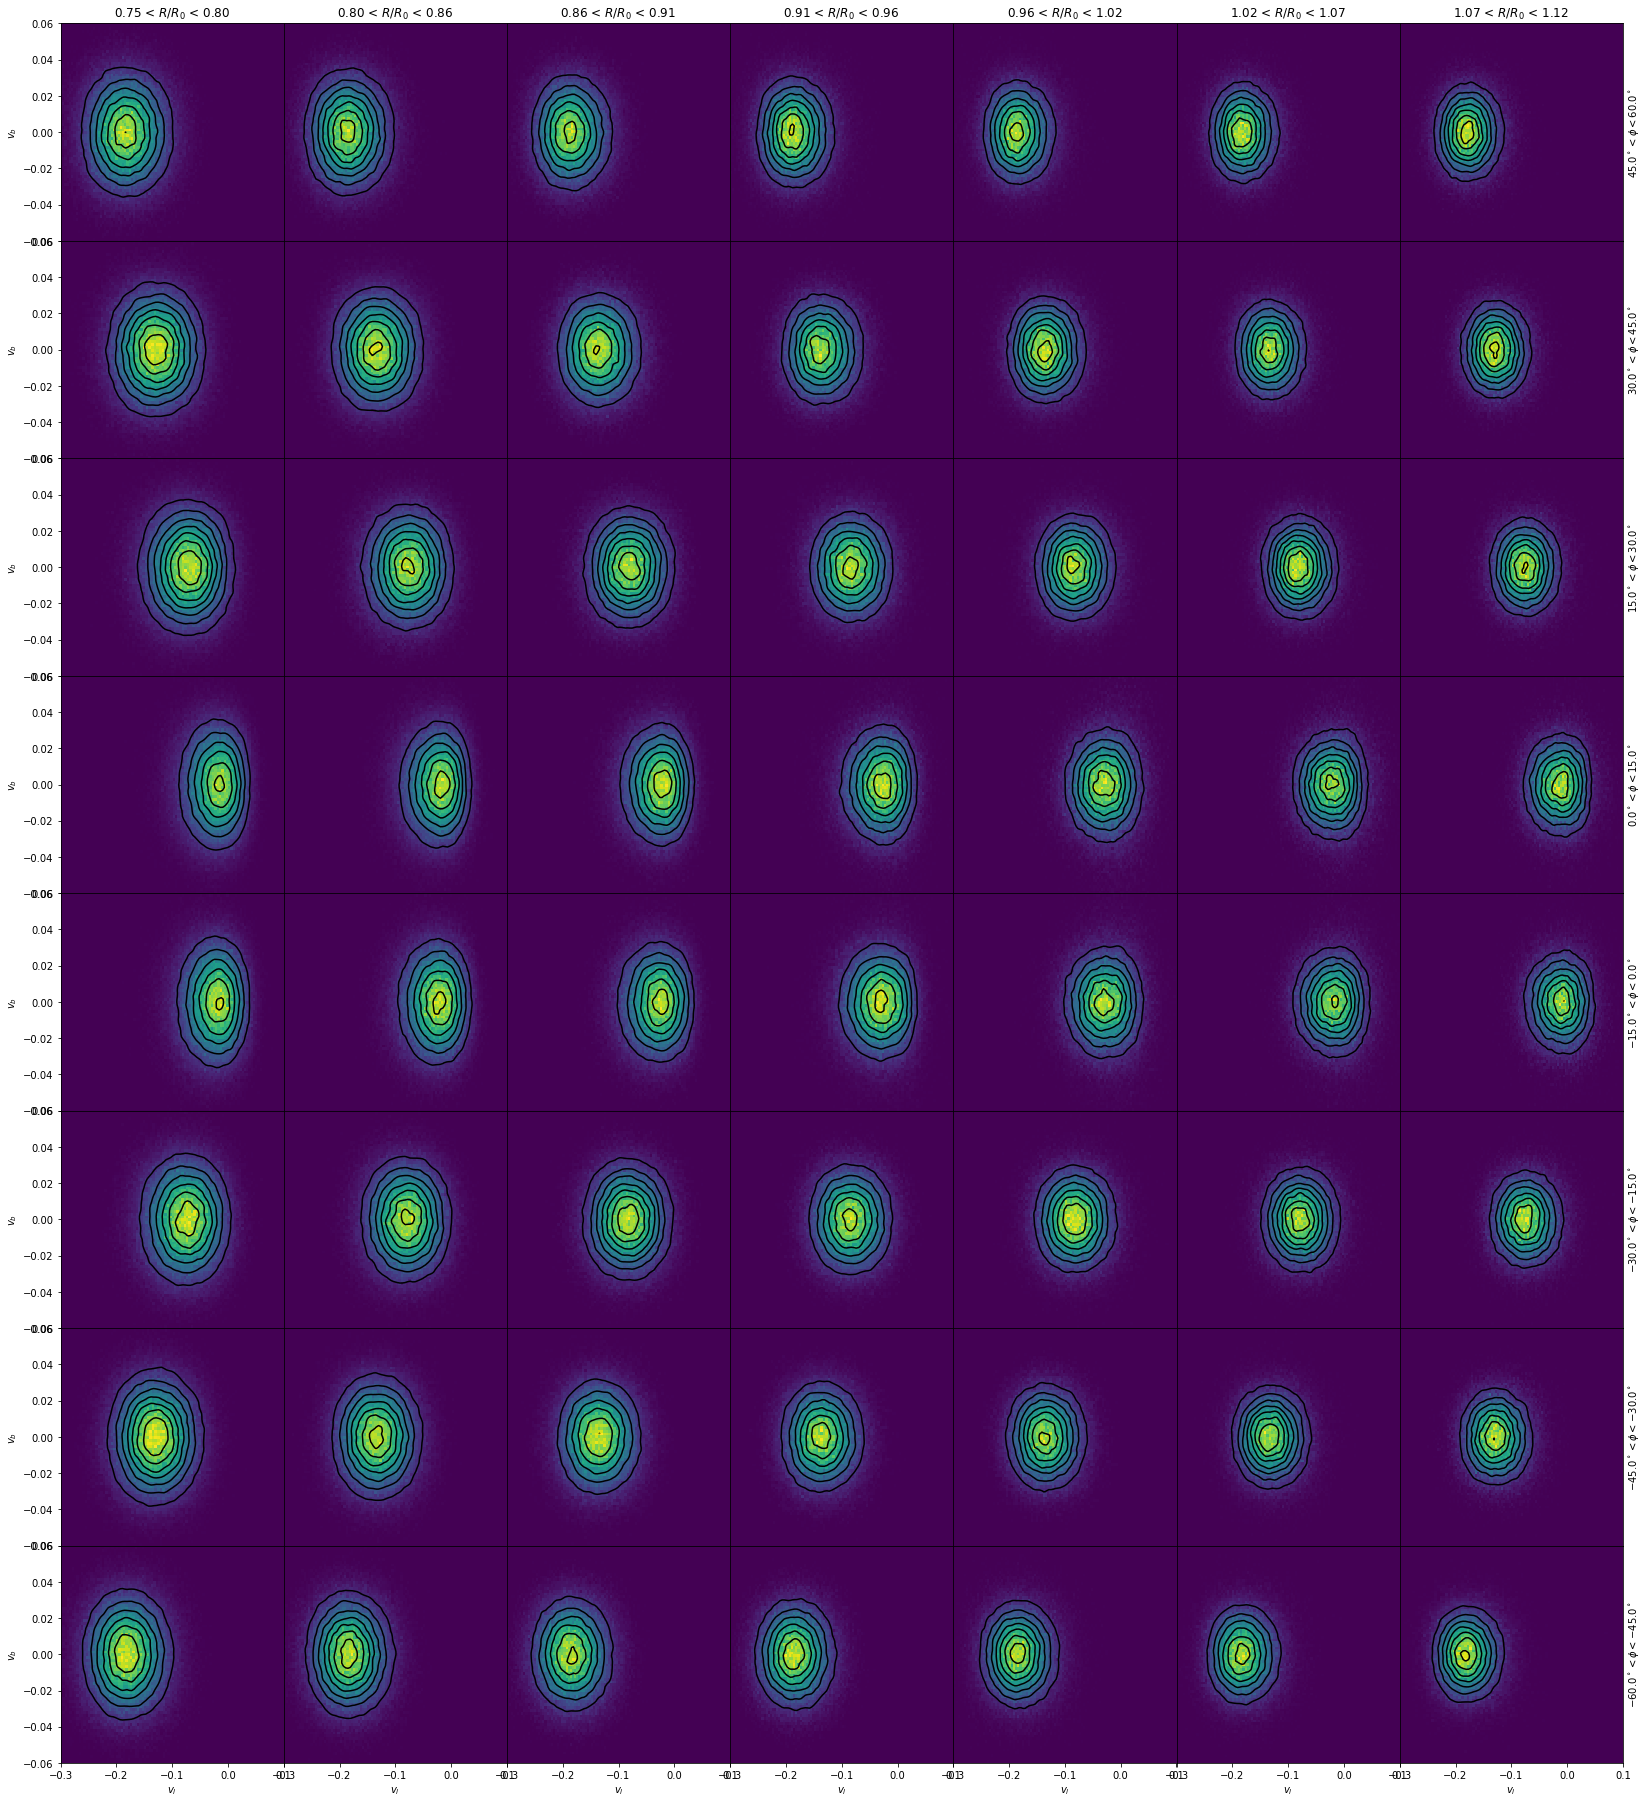

In [6]:
rows = 8
cols = 7
minR = 6
maxR = 9
minphi = -np.pi/3
maxphi = np.pi/3
plot_vlvb(rows, cols, minR, maxR, minphi, maxphi, R, phi, vl, vb)

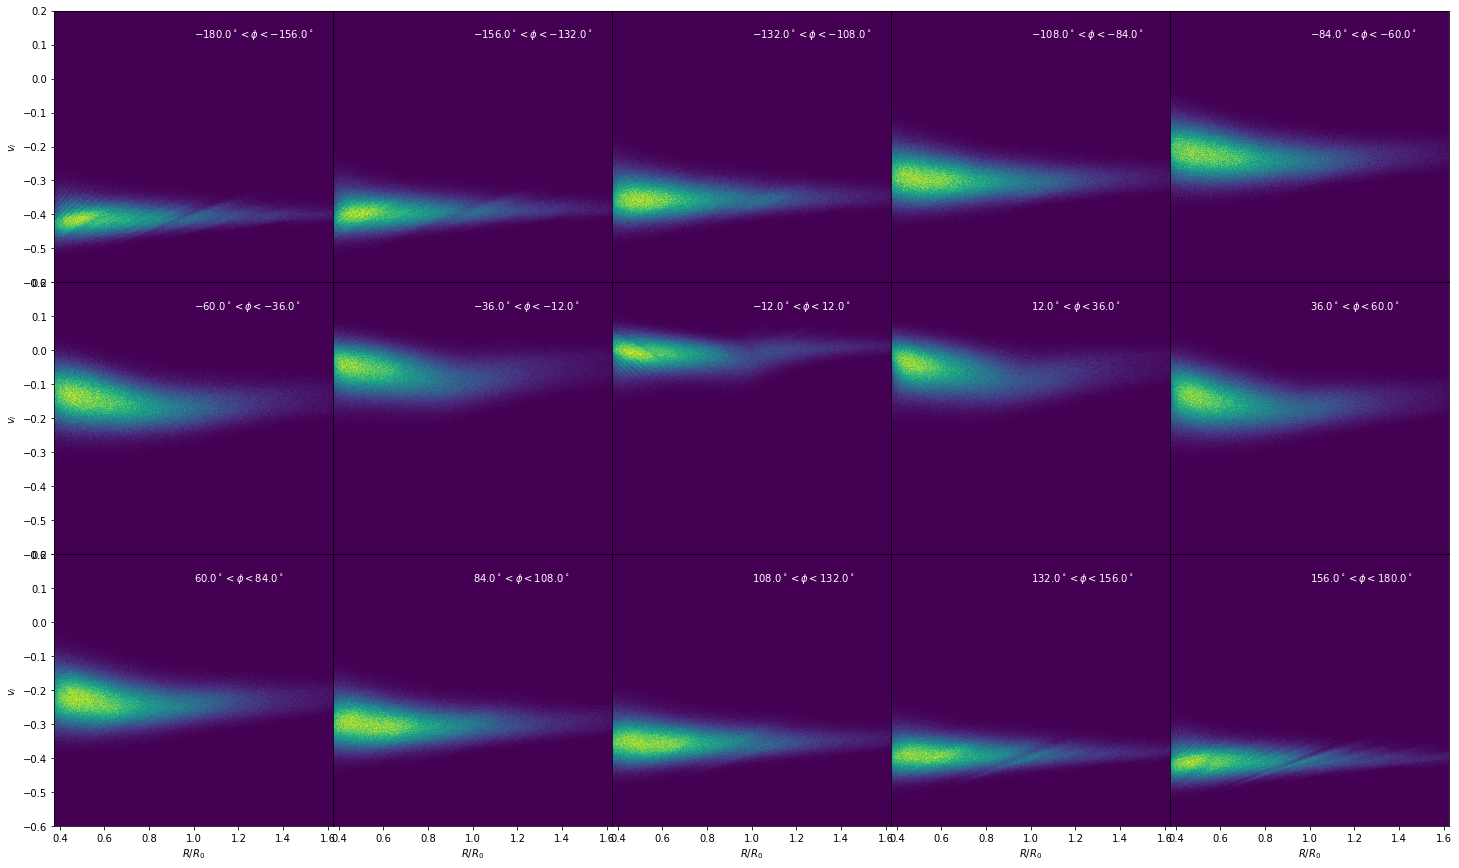

In [7]:
rows = 3
cols = 5
minphi = -np.pi
maxphi = np.pi
plot_Rvl(rows, cols, minphi, maxphi, R, phi, vl)

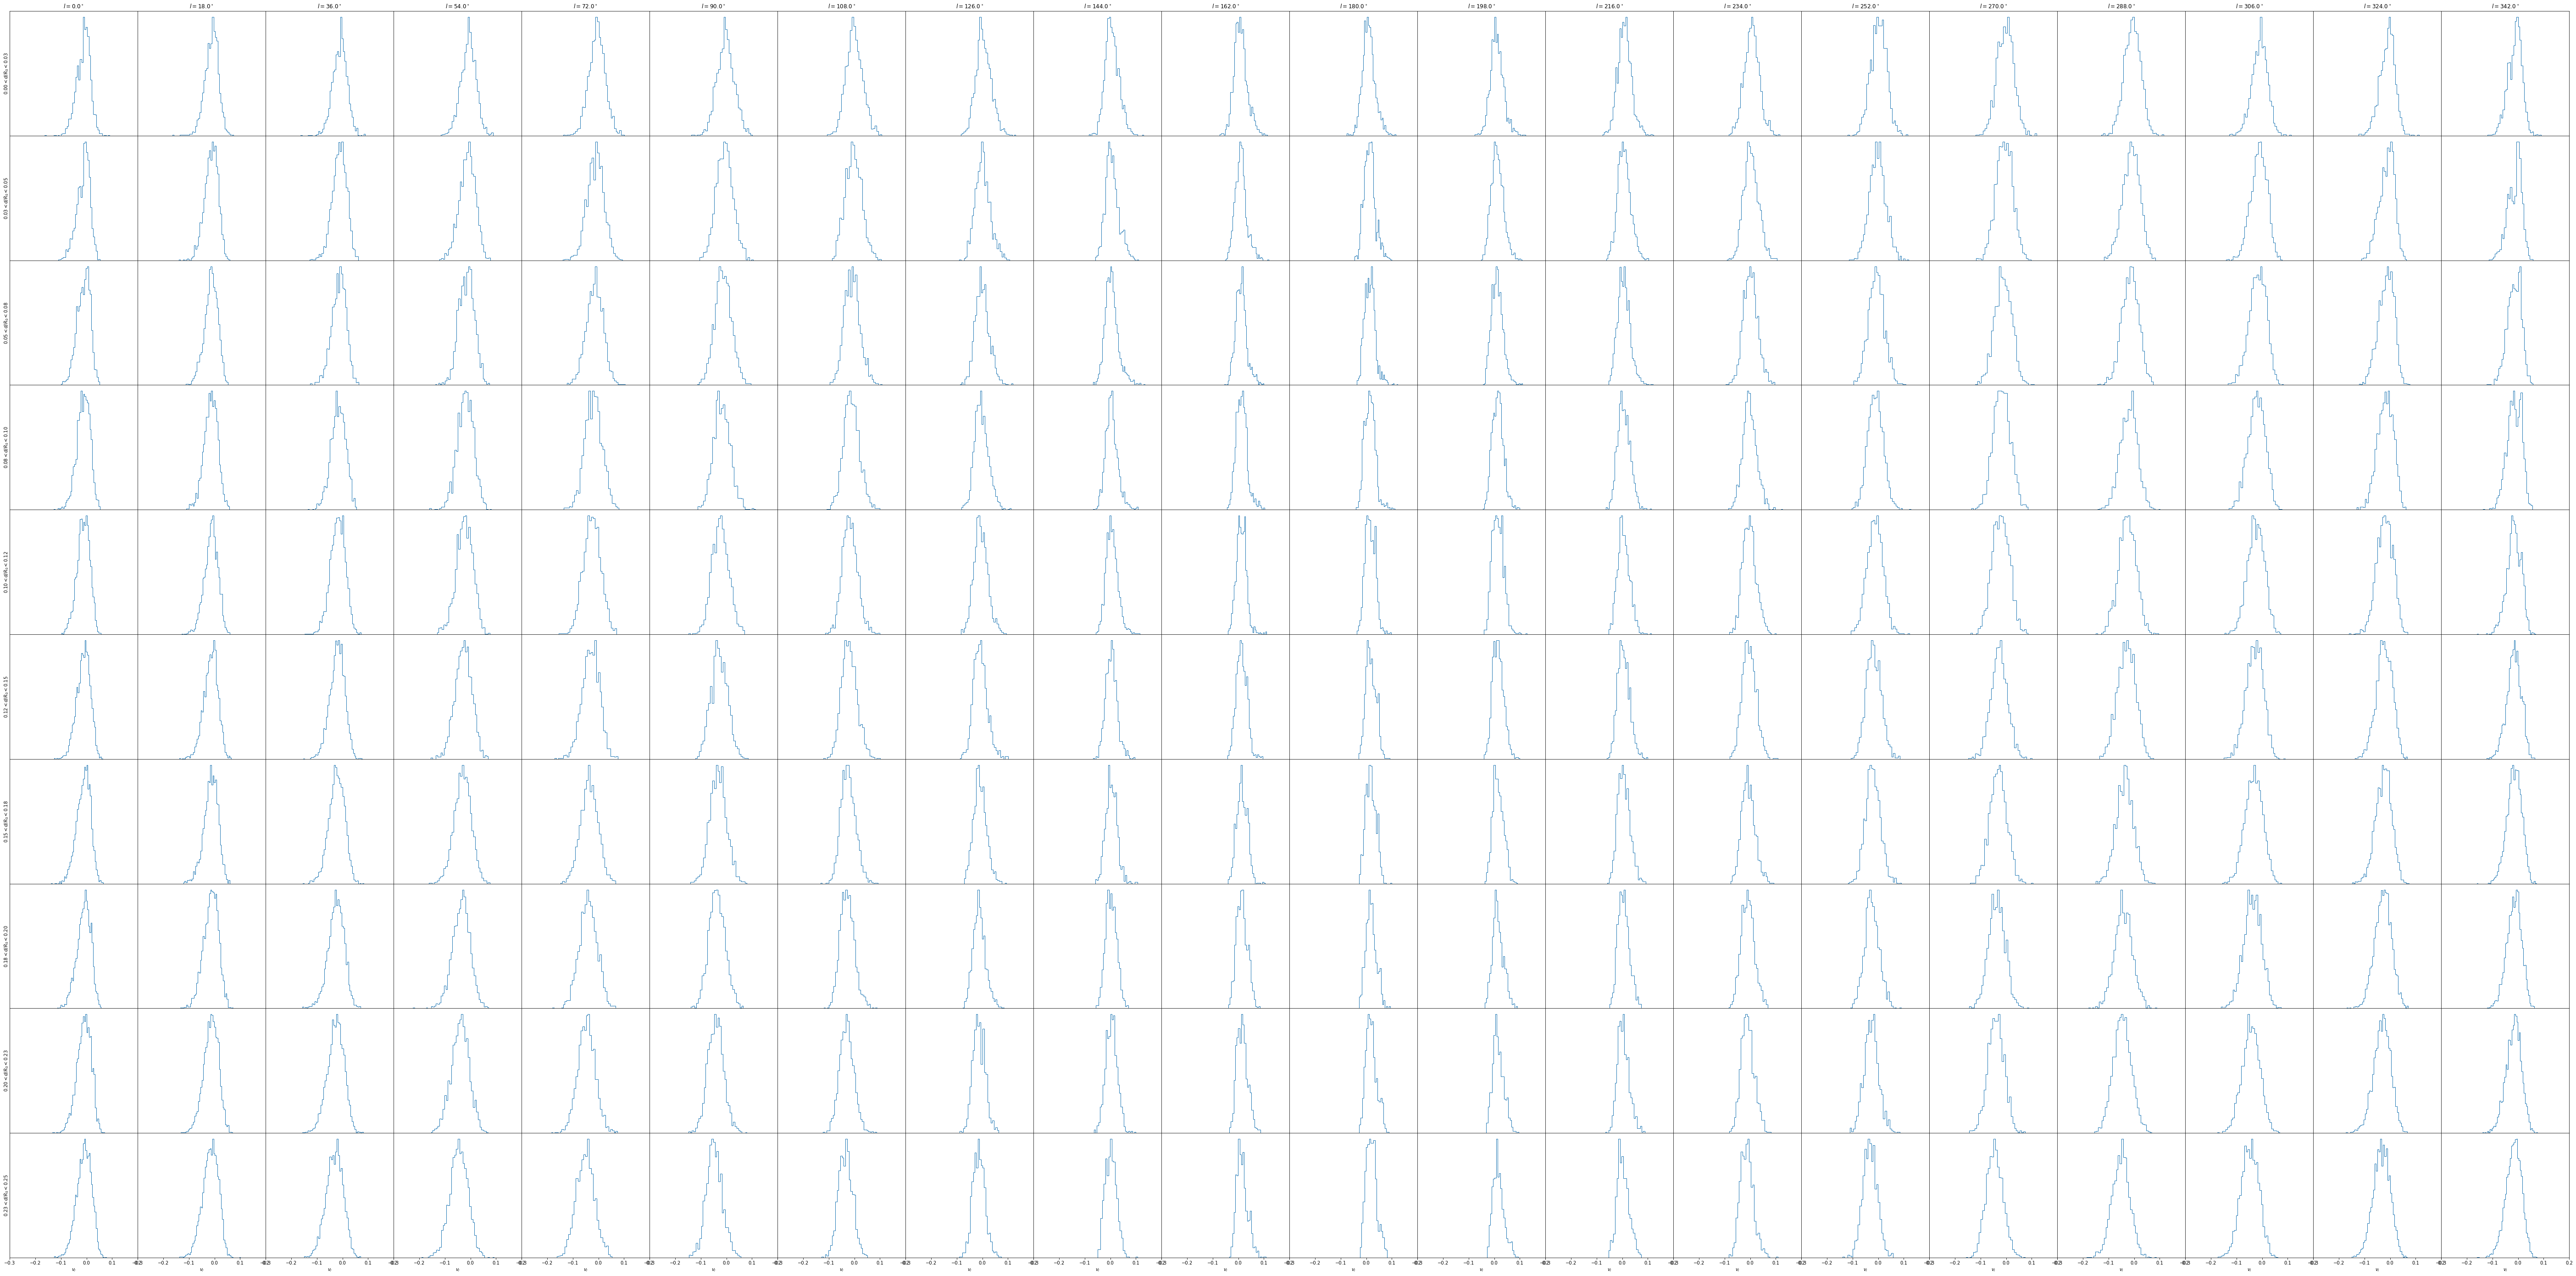

In [8]:
rows = 10
cols = 20
minl = 0
maxl = 2*np.pi
xlength = 0.25
ywidth = 0.01
plot_los(rows, cols, minl, maxl, xlength, ywidth, X, Y, vl)

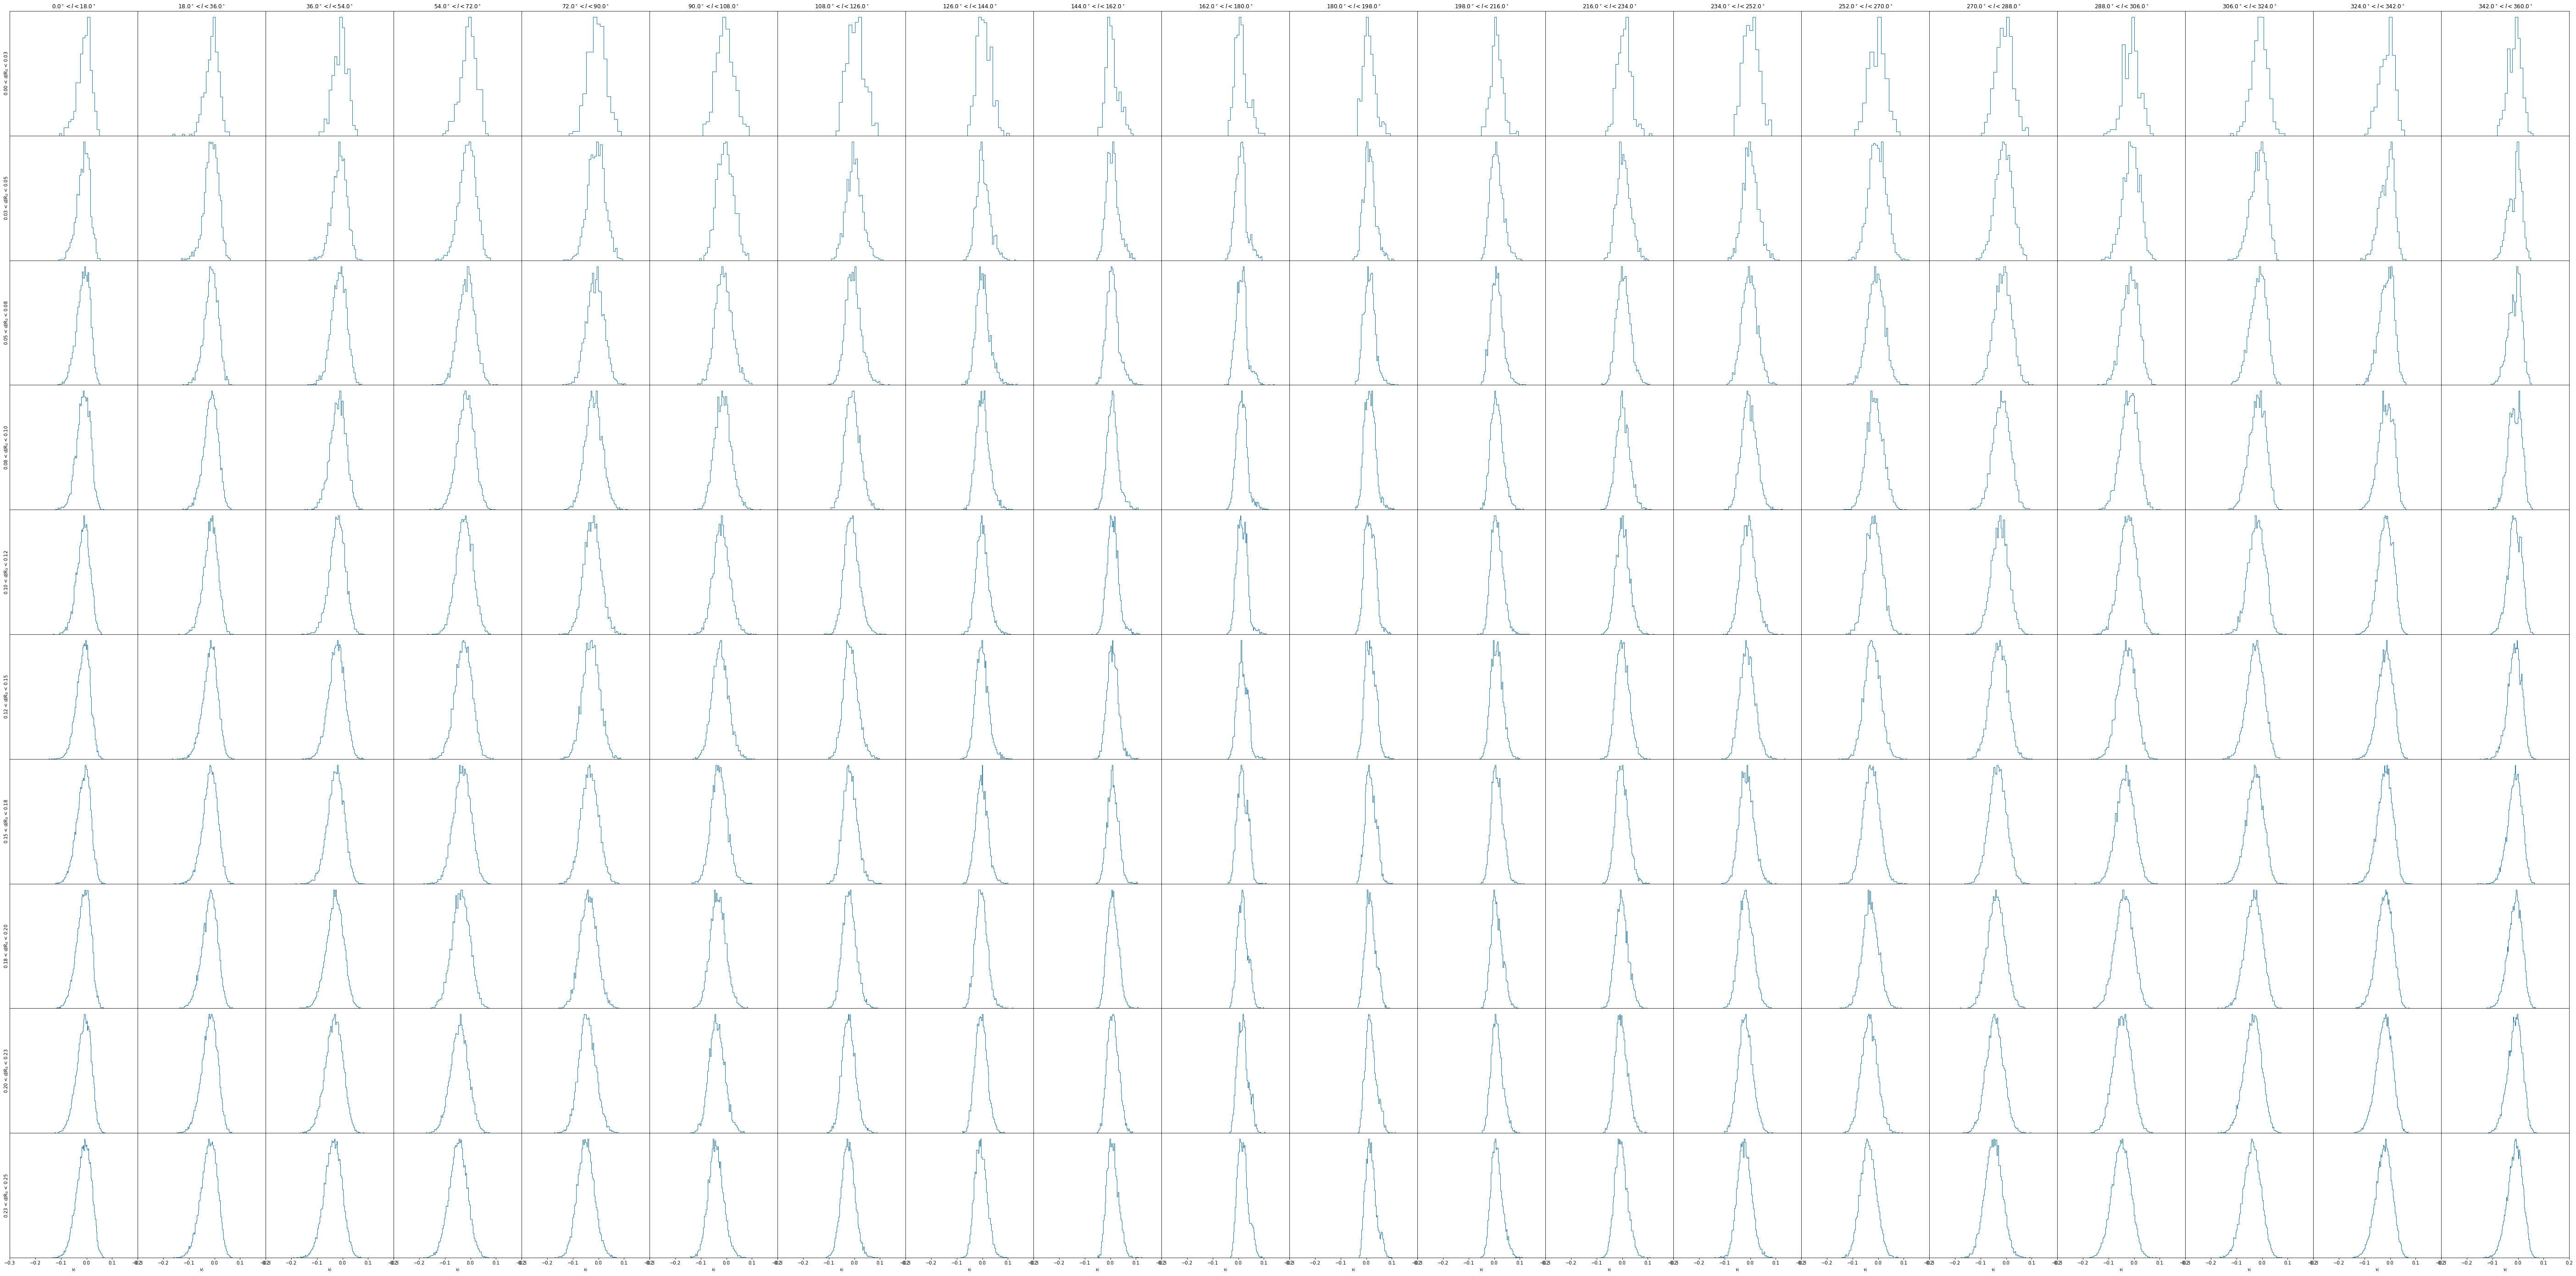

In [9]:
rows = 10
cols = 20
minl = 0
maxl = 2*np.pi
maxd = 0.25
plot_los_cones(rows, cols, minl, maxl, maxd, l, vl, d)

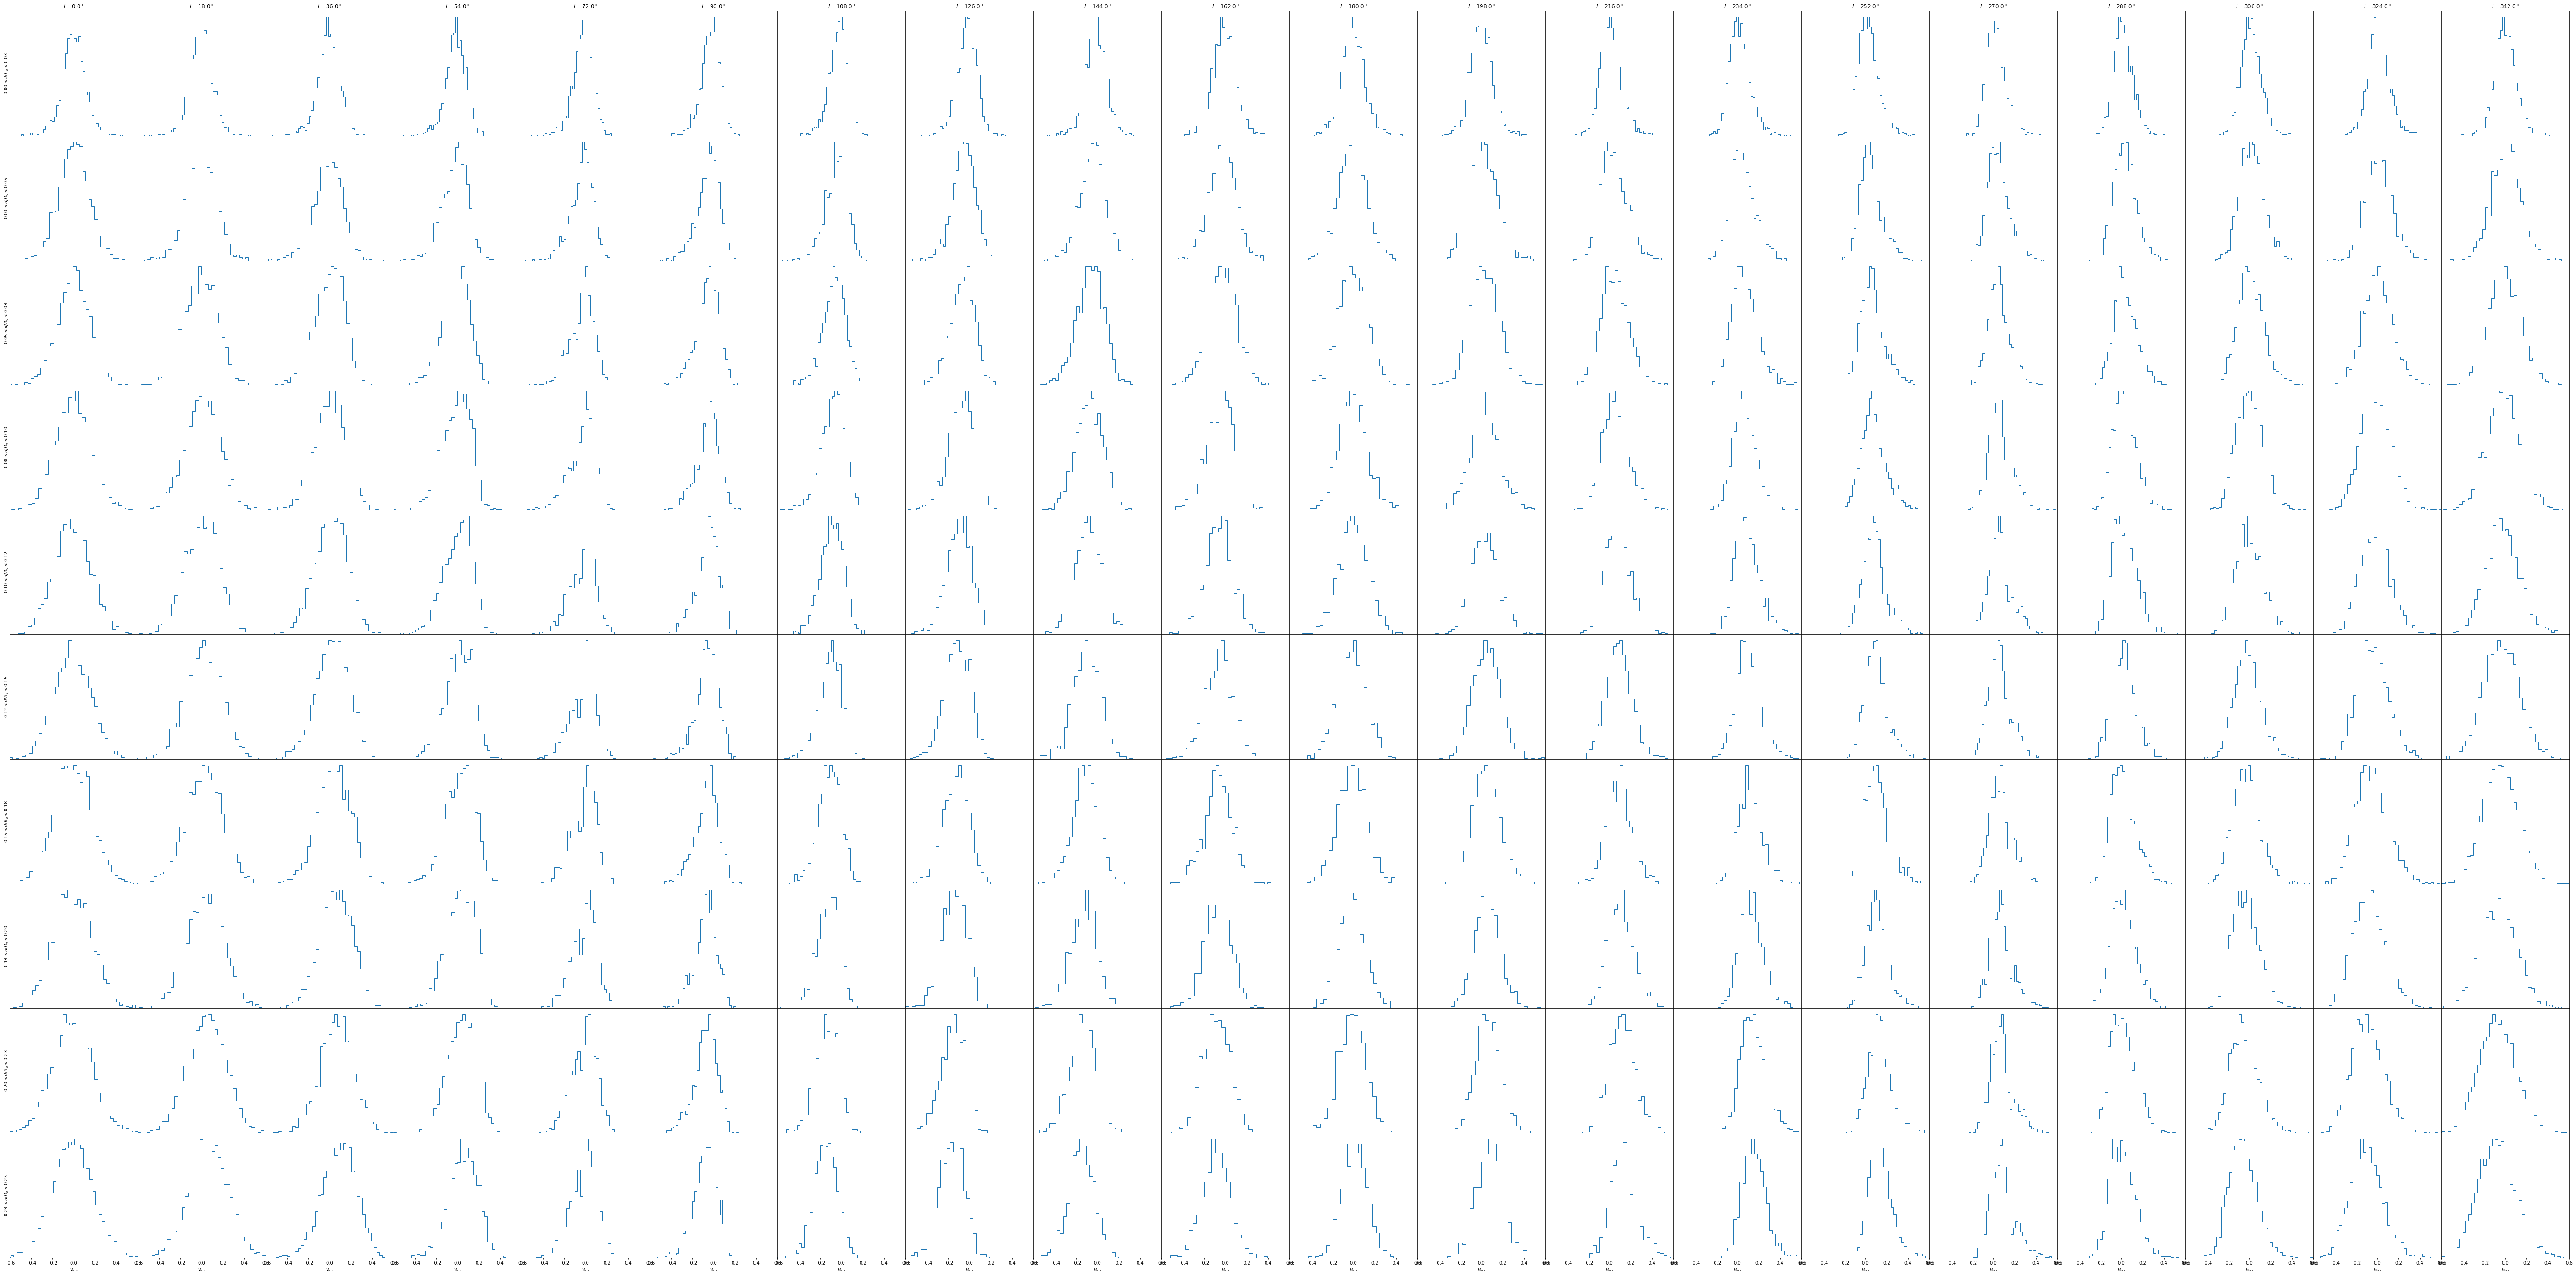

In [10]:
rows = 10
cols = 20
minl = 0
maxl = 2*np.pi
xlength = 0.25
ywidth = 0.01
plot_los(rows, cols, minl, maxl, xlength, ywidth, X, Y, vr, vlos=True, xlim=(-0.6,0.6))

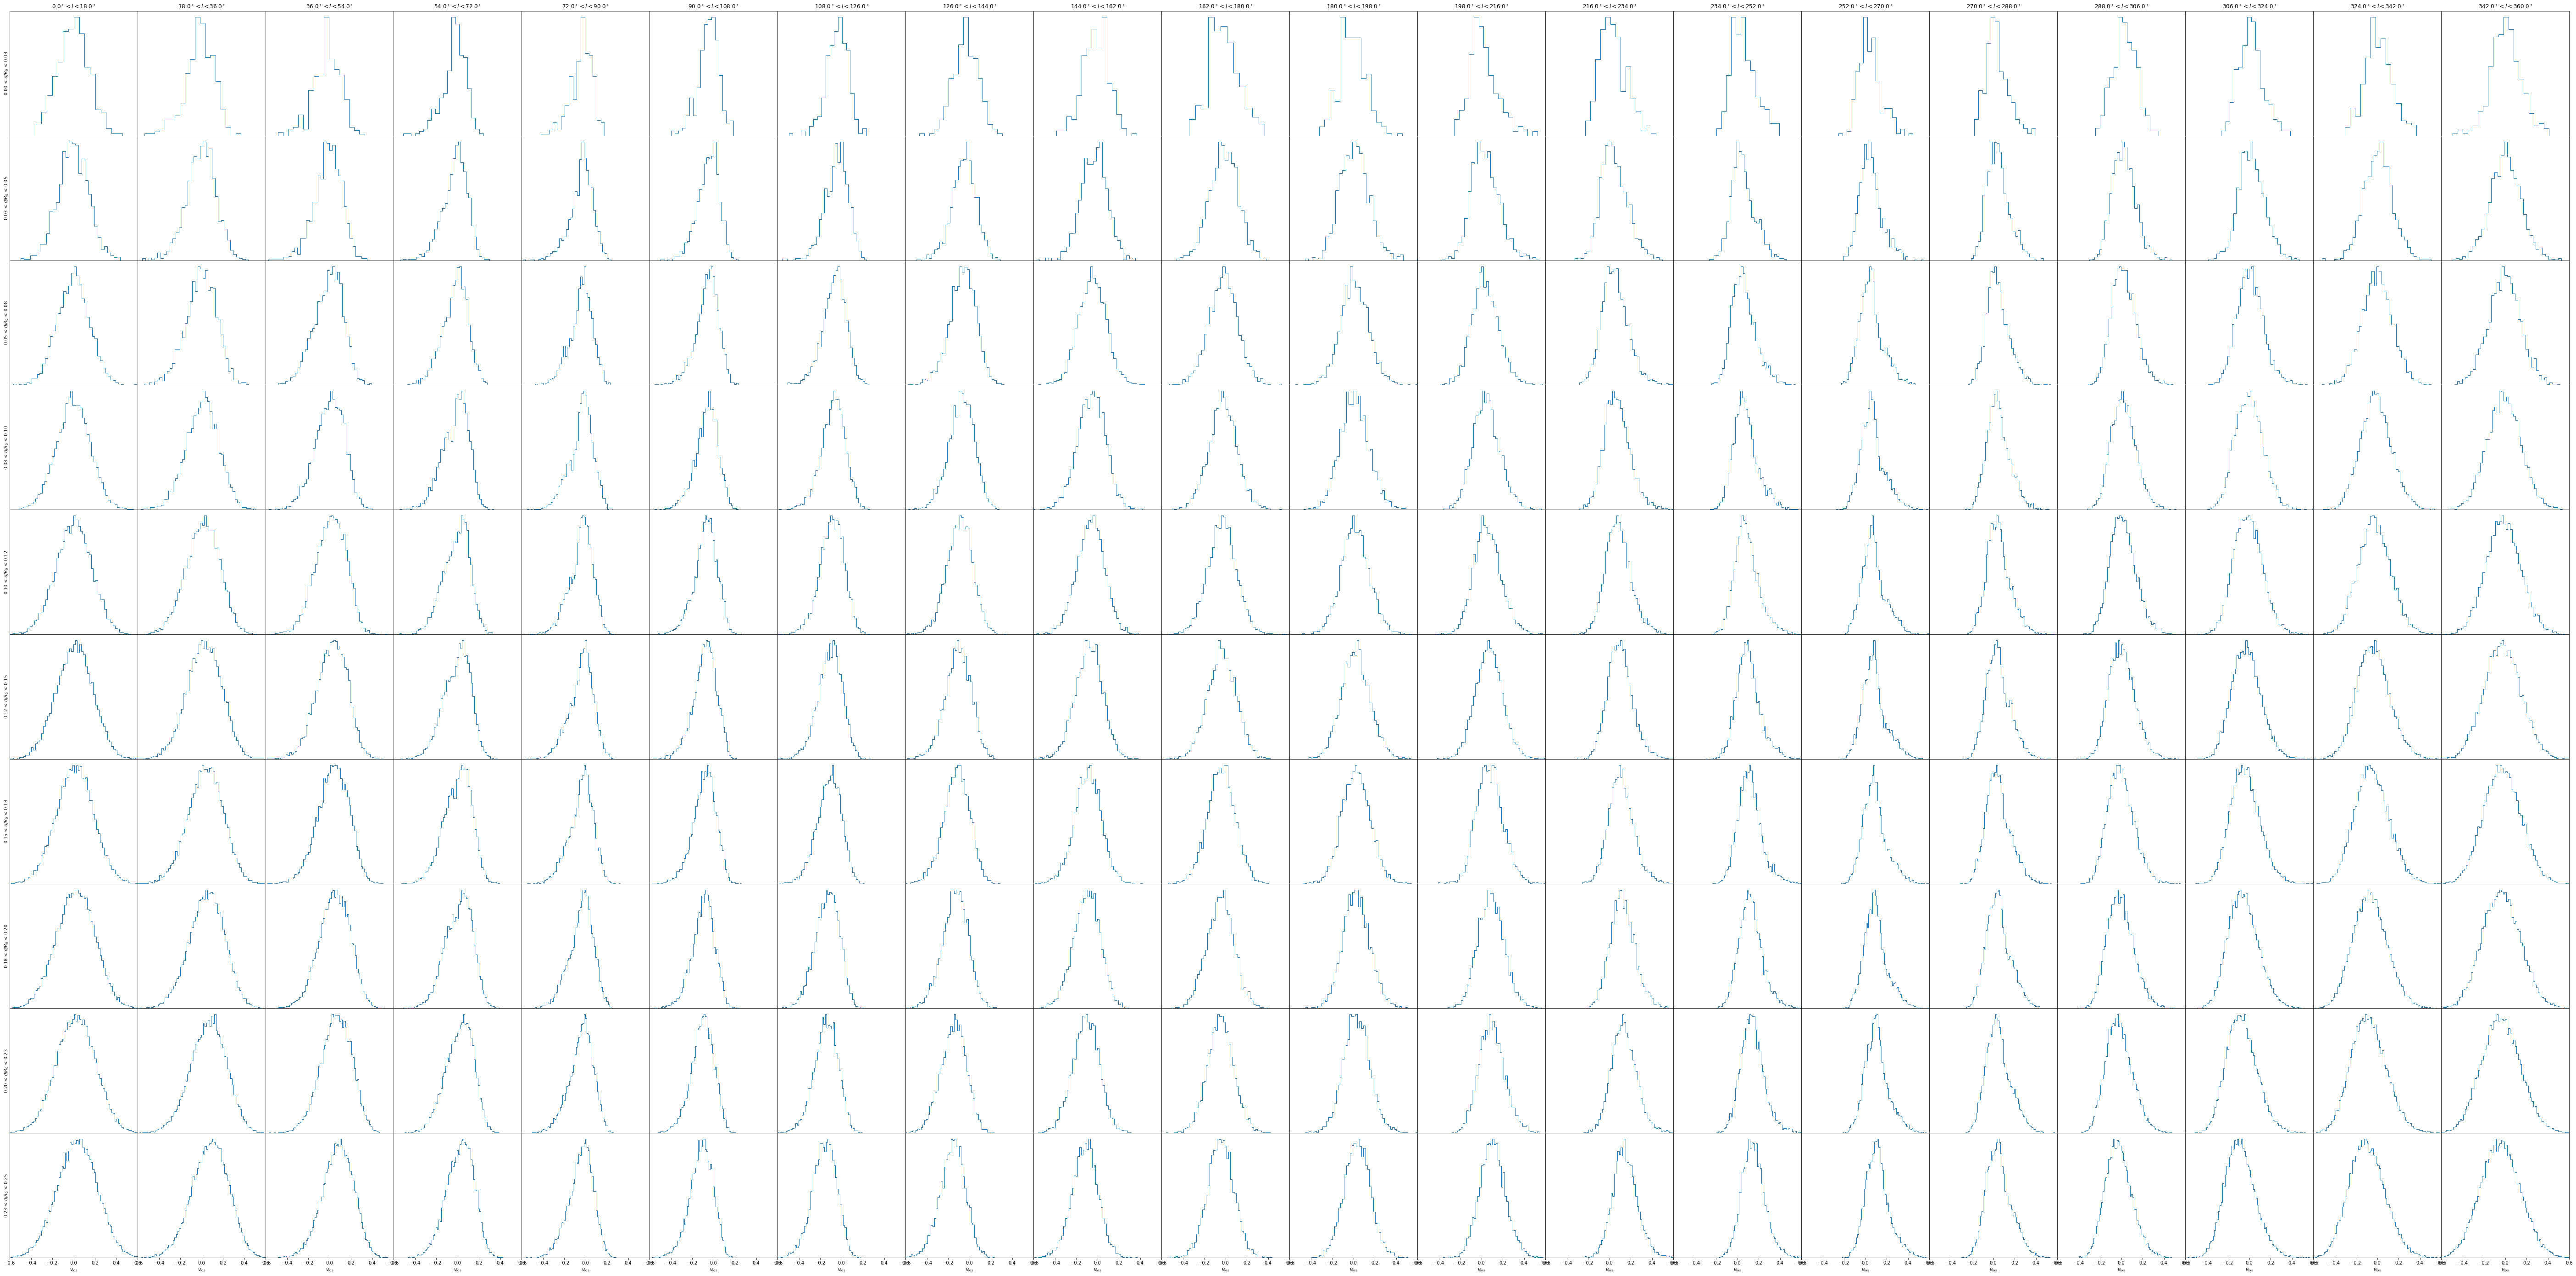

In [11]:
rows = 10
cols = 20
minl = 0
maxl = 2*np.pi
maxd = 0.25
plot_los_cones(rows, cols, minl, maxl, maxd, l, vr, d, vlos=True, xlim=(-0.6,0.6))